In [1]:
""" Demographic Analysis

How demographic factors such as age, gender, job level, industry correlate with reported level of happiness ? """

' Demographic Analysis\n\nHow demographic factors such as age, gender, job level, industry correlate with reported level of happiness ? '

In [2]:
#Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Importing the data and data exploration

In [5]:
Survey_data = pd.read_csv("Survey_data.csv")

In [6]:
Survey_data.head()

,Person_id,Age,Gender,Industry,Job_level,Work-life_balance,Remote_frequency,Stress_level,Important_Aspect,Job_satisfaction,Happiness_level
0,20240109223046,25-34,Female,Business,Entry-level,5,Everyday,3,Recognition and appreciation,5,NaN
1,20240109223634,25-34,Female,Technology,Entry-level,5,Everyday,4,Compensation and benefits,6,8.0
2,20240110095600,25-34,Female,Technology,Entry-level,1,Everyday,5,all of them!,3,3.0
3,20240110095541,25-34,Female,Business,Entry-level,2,Everyday,4,Work relationships,4,6.0
4,20240110103651,35-44,Male,Healthcare,Senior-level,2,Never,3,Opportunities for growth,4,8.0


In [7]:
#Calculate the means of integers columns

Survey_data.loc[:, 'Job_satisfaction'].mean()

6.108695652173913

In [8]:
Survey_data.loc[:, 'Job_satisfaction'].std()

1.779241547146364

In [9]:
Survey_data.loc[:, 'Happiness_level'].mean()

7.066666666666666

In [10]:
Survey_data.loc[:, 'Happiness_level'].std()

1.6706014159305298

In [11]:
Survey_data.loc[:, 'Work-life_balance'].mean() #out of 5

3.4347826086956523

In [12]:
Survey_data.loc[:, 'Stress_level'].mean() #out of 5

3.282608695652174

In [13]:
#Study correlation between factors

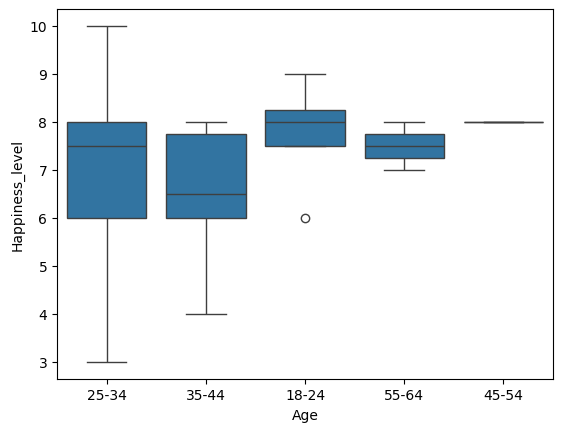

In [14]:
#Age and level of happiness

sns.boxplot(x='Age', y='Happiness_level', data=Survey_data)
plt.show()

**The age group with the highest happiness is the group between 18-24 years old. The age group with the lowest level of happiness is the group between 35-44 years old.**

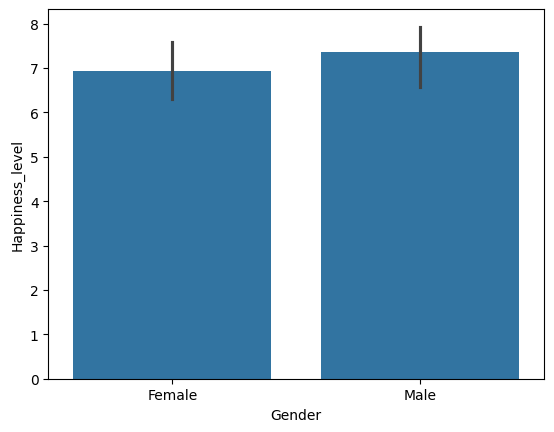

In [15]:
#Gender and level of happiness

sns.barplot(x='Gender', y='Happiness_level', data=Survey_data)
plt.show()

**The happiness level between men and women is very similar, aound 7/10.**

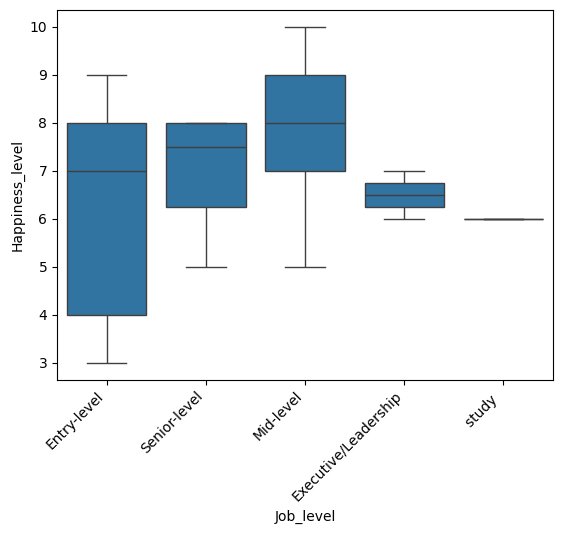

In [16]:
#Job level and level of happiness

sns.boxplot(x='Job_level', y='Happiness_level', data=Survey_data)
plt.xticks(rotation=45, ha='right')
plt.show()

**The job-level with the highest happiness level is the mid-level (8/10) while the job level with the lowest happiness level is the Executive/Leadership level.**

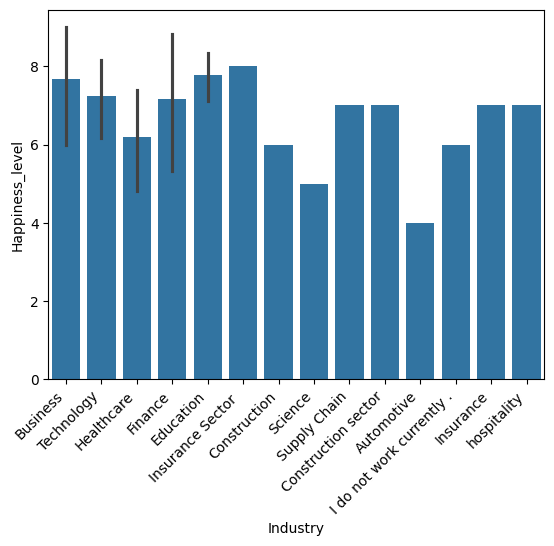

In [17]:
#Industry and level of happiness

sns.barplot(x='Industry', y='Happiness_level', data=Survey_data)
plt.xticks(rotation=45, ha='right')
plt.show()

**The industry with the highest level of happiness is "Insurance sector" while the industry with the lowest happiness level is the "Automotive sector".**



In [18]:
# PEARSON correlation analysis
print(Survey_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person_id          46 non-null     int64  
 1   Age                46 non-null     object 
 2   Gender             46 non-null     object 
 3   Industry           46 non-null     object 
 4   Job_level          46 non-null     object 
 5   Work-life_balance  46 non-null     int64  
 6   Remote_frequency   46 non-null     object 
 7   Stress_level       46 non-null     int64  
 8   Important_Aspect   46 non-null     object 
 9   Job_satisfaction   46 non-null     int64  
 10  Happiness_level    45 non-null     float64
dtypes: float64(1), int64(4), object(6)
memory usage: 4.1+ KB
None


In [19]:
# Convert the age into a numerical value - PEARSON CORRELATION

In [20]:
Survey_data["Age"].value_counts()

25-34    33
35-44     6
18-24     4
55-64     2
45-54     1
Name: Age, dtype: int64

In [21]:
age_mapping = {
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65 or older': 6
}

In [22]:
Survey_data['Age_Numeric'] = Survey_data['Age'].replace(age_mapping)

In [23]:
Survey_data.head()

,Person_id,Age,Gender,Industry,Job_level,Work-life_balance,Remote_frequency,Stress_level,Important_Aspect,Job_satisfaction,Happiness_level,Age_Numeric
0,20240109223046,25-34,Female,Business,Entry-level,5,Everyday,3,Recognition and appreciation,5,NaN,2
1,20240109223634,25-34,Female,Technology,Entry-level,5,Everyday,4,Compensation and benefits,6,8.0,2
2,20240110095600,25-34,Female,Technology,Entry-level,1,Everyday,5,all of them!,3,3.0,2
3,20240110095541,25-34,Female,Business,Entry-level,2,Everyday,4,Work relationships,4,6.0,2
4,20240110103651,35-44,Male,Healthcare,Senior-level,2,Never,3,Opportunities for growth,4,8.0,3


In [24]:
correlation_age = Survey_data['Age_Numeric'].corr(Survey_data['Happiness_level'])
print(f"Pearson correlation between age and happiness: {correlation_age}")

Pearson correlation between age and happiness: -0.02756153643452292


**The Age and the happiness level aren't correlated.**

In [25]:
# Repeating the process with the gender - PEARSON CORRELATION

In [26]:
Survey_data["Gender"].value_counts()

Female    32
Male      14
Name: Gender, dtype: int64

In [27]:
gender_mapping = {
    "Female":1,
    "Male":2,
}

In [28]:
Survey_data['Gender_Numeric'] = Survey_data['Gender'].replace(gender_mapping)

In [29]:
Survey_data.head()

,Person_id,Age,Gender,Industry,Job_level,Work-life_balance,Remote_frequency,Stress_level,Important_Aspect,Job_satisfaction,Happiness_level,Age_Numeric,Gender_Numeric
0,20240109223046,25-34,Female,Business,Entry-level,5,Everyday,3,Recognition and appreciation,5,NaN,2,1
1,20240109223634,25-34,Female,Technology,Entry-level,5,Everyday,4,Compensation and benefits,6,8.0,2,1
2,20240110095600,25-34,Female,Technology,Entry-level,1,Everyday,5,all of them!,3,3.0,2,1
3,20240110095541,25-34,Female,Business,Entry-level,2,Everyday,4,Work relationships,4,6.0,2,1
4,20240110103651,35-44,Male,Healthcare,Senior-level,2,Never,3,Opportunities for growth,4,8.0,3,2


In [30]:
correlation_gender = Survey_data['Gender_Numeric'].corr(Survey_data['Happiness_level'])
print(f"Pearson correlation between gender and happiness: {correlation_gender}")

Pearson correlation between gender and happiness: 0.1181682447608491


**Again, not a huge correlation between the gender and the happiness level.**

In [31]:
# Repeating the process with the job-level - PEARSON CORRELATION

In [32]:
Survey_data["Job_level"].value_counts()

Mid-level               20
Entry-level             17
Senior-level             6
Executive/Leadership     2
study                    1
Name: Job_level, dtype: int64

In [33]:
job_level_mapping = {
    "study":1,
    "Entry-level":2,
    "Mid-level":3,
    "Senior-level":4,
    "Executive/Leadership":5,
}

In [34]:
Survey_data['Job_Level_Numeric'] = Survey_data['Job_level'].replace(job_level_mapping)

In [35]:
Survey_data.head()

,Person_id,Age,Gender,Industry,Job_level,Work-life_balance,Remote_frequency,Stress_level,Important_Aspect,Job_satisfaction,Happiness_level,Age_Numeric,Gender_Numeric,Job_Level_Numeric
0,20240109223046,25-34,Female,Business,Entry-level,5,Everyday,3,Recognition and appreciation,5,NaN,2,1,2
1,20240109223634,25-34,Female,Technology,Entry-level,5,Everyday,4,Compensation and benefits,6,8.0,2,1,2
2,20240110095600,25-34,Female,Technology,Entry-level,1,Everyday,5,all of them!,3,3.0,2,1,2
3,20240110095541,25-34,Female,Business,Entry-level,2,Everyday,4,Work relationships,4,6.0,2,1,2
4,20240110103651,35-44,Male,Healthcare,Senior-level,2,Never,3,Opportunities for growth,4,8.0,3,2,4


In [36]:
Survey_data['Job_Level_Numeric'] = pd.to_numeric(Survey_data['Job_Level_Numeric'], errors='coerce')

In [37]:
correlation_job_level = Survey_data['Job_Level_Numeric'].corr(Survey_data['Happiness_level'])
print(f"Pearson correlation between job level and happiness: {correlation_job_level}")

Pearson correlation between job level and happiness: 0.1602170482049841


**There is a very slight/weak correlation between the job level and the level of happiness according to our Pearson correlation.**

In [38]:
# Repeating the process with the industry - PEARSON CORRELATION

In [39]:
Survey_data["Industry"].value_counts()

Technology                   13
Education                     9
Finance                       6
Healthcare                    5
Business                      4
Insurance Sector              1
Construction                  1
Science                       1
Supply Chain                  1
Construction sector           1
Automotive                    1
I do not work currently .     1
Insurance                     1
hospitality                   1
Name: Industry, dtype: int64

In [40]:
industry_mapping = {
    "Technology":1,
    "Education":2,
    "Finance":3,
    "Healthcare":4,
    "Business":5,
    "Insurance Sector ":6,
    "Construction":7,
    "Science":8,
    "Supply Chain":9,
    "Construction sector":7,
    "Automotive":10,
    "I do not work currently .":11,
    "Insurance":6,
    "hospitality":12,
}

In [41]:
Survey_data['Industry_Numeric'] = Survey_data['Industry'].replace(industry_mapping)

In [42]:
Survey_data["Industry_Numeric"].value_counts() #making sure it worked for every values

1     13
2      9
3      6
4      5
5      4
6      2
7      2
8      1
9      1
10     1
11     1
12     1
Name: Industry_Numeric, dtype: int64

In [43]:
correlation_industry = Survey_data['Industry_Numeric'].corr(Survey_data['Happiness_level'])
print(f"Pearson correlation between industry and happiness: {correlation_industry}")

Pearson correlation between industry and happiness: -0.256770336703124


**This negative correlation suggests a weak negative linear relationship between industry and reported happiness levels in your dataset.**

In [44]:
#What about the correlation between the age and the job satisfaction or the gender and job staisfaction?

In [45]:
correlation_age_js = Survey_data['Age_Numeric'].corr(Survey_data['Job_satisfaction'])
print(f"Pearson correlation between age and job satisfaction: {correlation_age_js}")

Pearson correlation between age and job satisfaction: -0.09338150986837764


In [46]:
correlation_gender_js = Survey_data['Gender_Numeric'].corr(Survey_data['Job_satisfaction'])
print(f"Pearson correlation between gender and job satisfaction: {correlation_gender_js}")

Pearson correlation between gender and job satisfaction: 0.20077024621701173


In [47]:
correlation_industry_js = Survey_data['Industry_Numeric'].corr(Survey_data['Job_satisfaction'])
print(f"Pearson correlation between industry and job satisfaction: {correlation_industry_js}")

Pearson correlation between industry and job satisfaction: -0.26500135441987577


In [48]:
# AGE and Most importan Aspect

<ipython-input-49-fb717fb38edb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'] == '25-34'], palette='viridis')


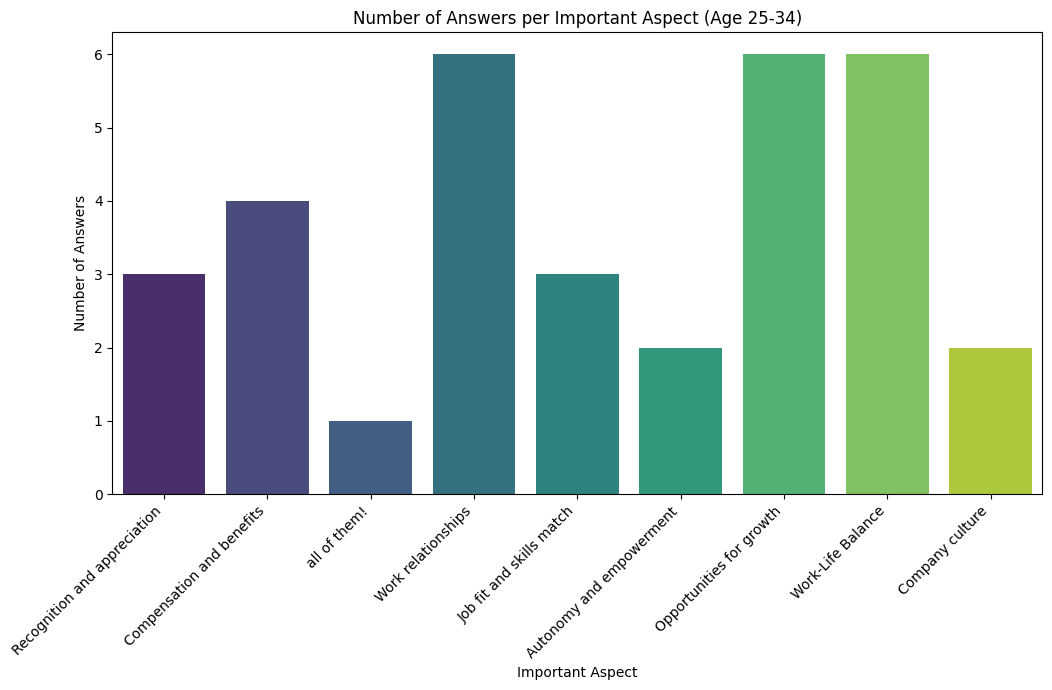

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'] == '25-34'], palette='viridis')
plt.title('Number of Answers per Important Aspect (Age 25-34)')
plt.xlabel('Important Aspect')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45, ha='right')
plt.show()



<ipython-input-50-6451cfba506a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'] == '18-24'], palette='viridis')


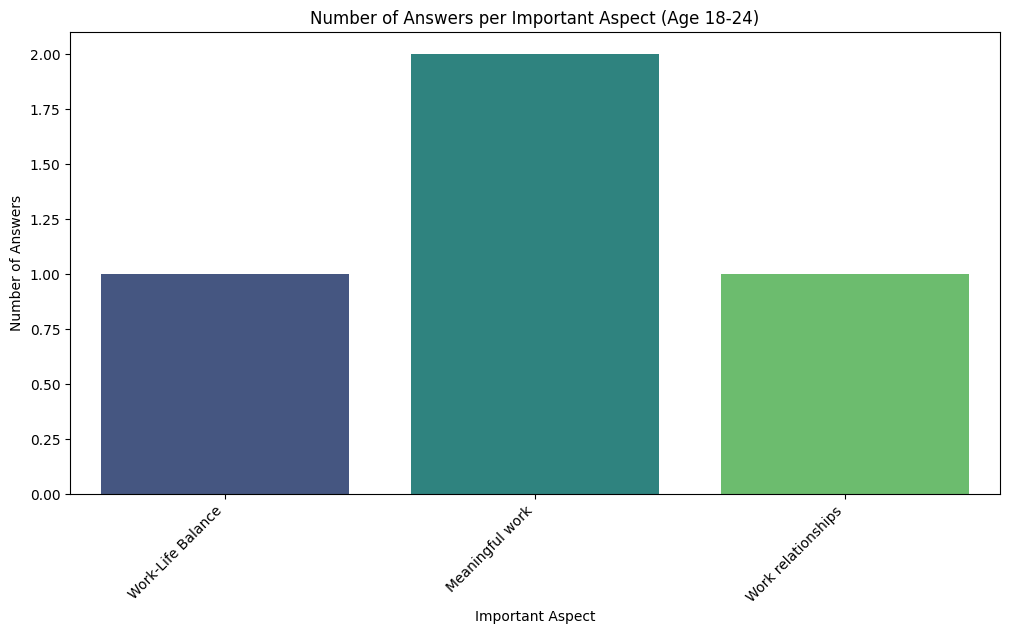

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'] == '18-24'], palette='viridis')
plt.title('Number of Answers per Important Aspect (Age 18-24)')
plt.xlabel('Important Aspect')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-51-5f2de9df10d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'].isin(selected_age_groups)], palette='viridis')


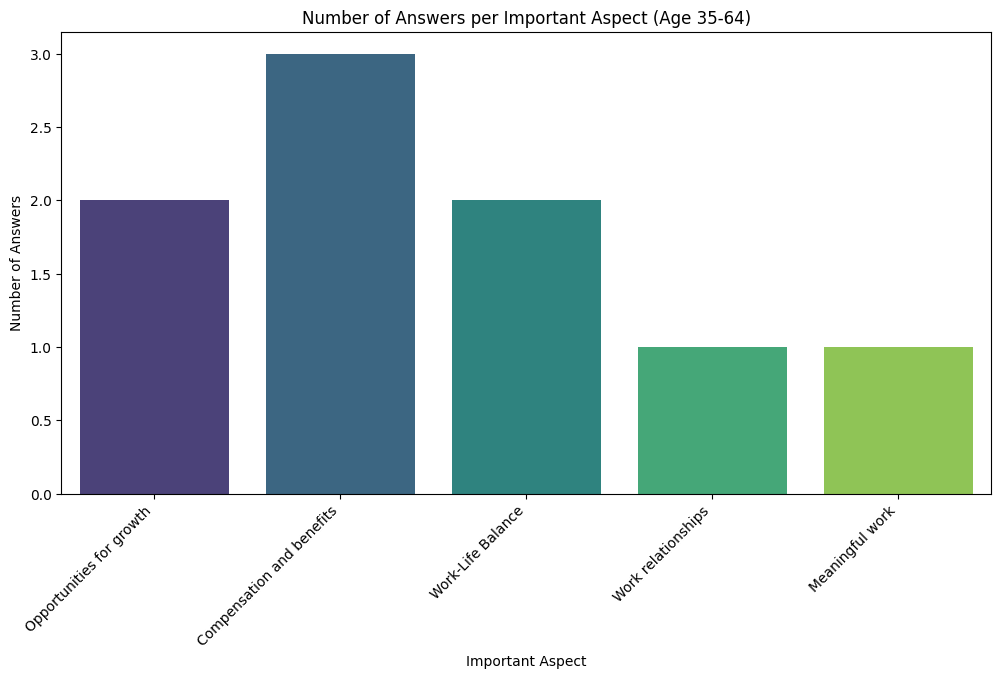

In [51]:
selected_age_groups = ['35-44', '45-54', '55-64']

plt.figure(figsize=(12, 6))
sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'].isin(selected_age_groups)], palette='viridis')
plt.title('Number of Answers per Important Aspect (Age 35-64)')
plt.xlabel('Important Aspect')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-52-28721f7e3b57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'] == '55-64'], palette='viridis')


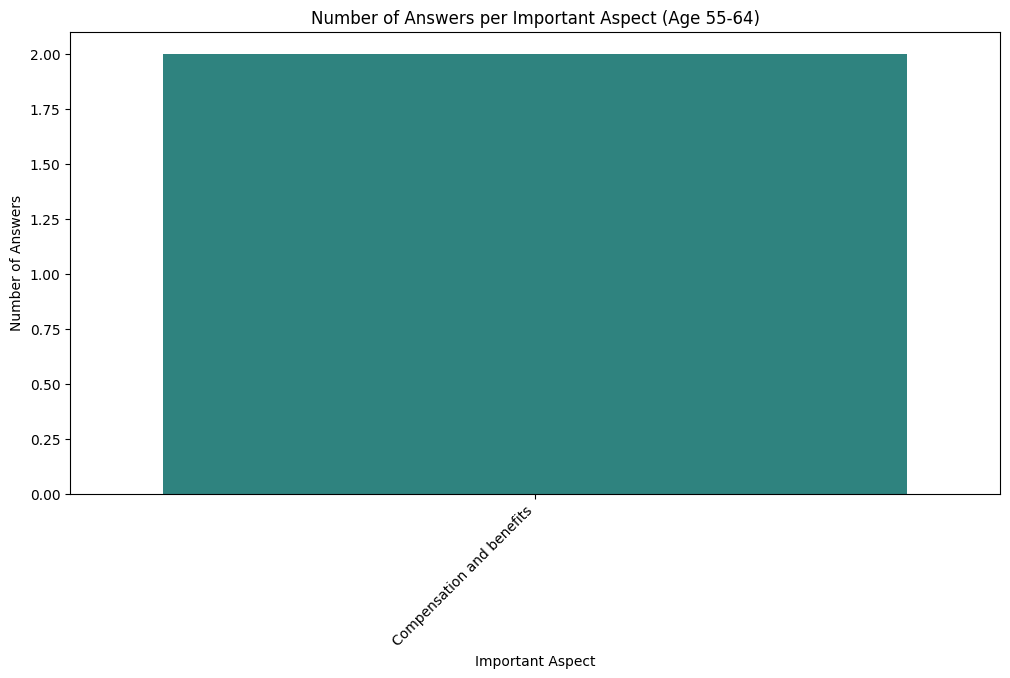

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Important_Aspect', data=Survey_data[Survey_data['Age'] == '55-64'], palette='viridis')
plt.title('Number of Answers per Important Aspect (Age 55-64)')
plt.xlabel('Important Aspect')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45, ha='right')
plt.show()

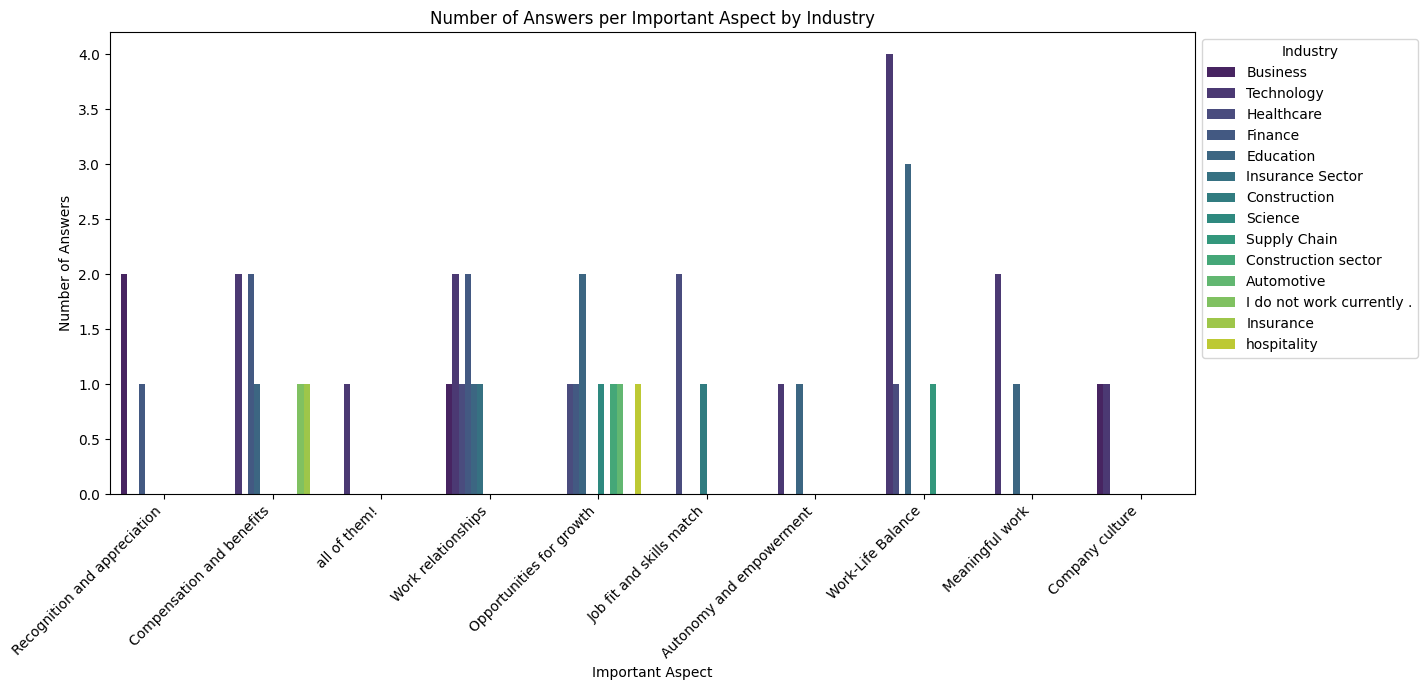

In [53]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Important_Aspect', data=Survey_data, hue='Industry', palette='viridis')
plt.title('Number of Answers per Important Aspect by Industry')
plt.xlabel('Important Aspect')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', bbox_to_anchor=(1, 1))
plt.show()
